#  <font color='green'> TP Séparateurs à Vaste Marge


<b> Student :</b> Ahlem JOUIDI

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##  <font color='red'>1. Données

*Nous utiliserons la base de données `breastcancer`, qui pour chaque observation $i$ comporte un ensemble de caractéristiques $x_i$ et une étiquette $y_i$ . Pour charger la base de données, téléchargez le fichier `wdbcM1_B0.data` et utilisez la fonction fournie dans le fichier annexe `breastcancer_utils.py`.*

In [3]:
from breastcancerutils import load_breastcancer
x, y = load_breastcancer("wdbcM1B0.data")
n, p = x.shape
c=1

X : une matrice de caracteristiques 

y : un vecteur des classes tel que

si $y[i] = 1$ , la tumeur est maligne 

et si $y[i] = -1$, la tumeur est benigne 

## <font color='red'> 2. Méthode du sous-gradient

# Question 2.1

Soient $a\in\mathbb{R}$ et $v \in \mathbb{R}^m$. On cherche $\min_\xi( \dfrac{1}{2}\sum_{j=1}^mv_j^2 + c\sum_{i=1}^n\xi_i)$

$\min_\xi( \dfrac{1}{2}\sum_{j=1}^mv_j^2 + c\sum_{i=1}^n\xi_i) = \dfrac{1}{2}\sum_{j=1}^mv_j^2 + \min_\xi(c\sum_{i=1}^n\xi_i)$

Or comme $\forall i, \xi_i \geq 0$ et $c \geq 0$, $\min_\xi(c\sum_{i=1}^n\xi_i) = c\sum_{i=1}^n\min_\xi\xi_i$

Soit $1\leq i\leq n$ :

- *Cas 1 : $1 - y_i(x_i^Tv + a) \geq 0 \Rightarrow$* $\min_\xi\xi_i = 1 - y_i(x_i^Tv + a)$
- *Cas 2 : $1 - y_i(x_i^Tv + a) \leq 0 \Rightarrow$* $\min_\xi\xi_i = 0$

Donc $\min_\xi(c\sum_{i=1}^n\xi_i) = c\sum_{i=1}^n\max(0, 1 - y_i(x_i^Tv + a))$

Or $\min_{v, a, \xi}( \dfrac{1}{2}\sum_{j=1}^mv_j^2 + c\sum_{i=1}^n\xi_i) = \min_{v, a}\min_\xi( \dfrac{1}{2}\sum_{j=1}^mv_j^2 + c\sum_{i=1}^n\xi_i)$

Donc $\min_{v, a, \xi}( \dfrac{1}{2}\sum_{j=1}^mv_j^2 + c\sum_{i=1}^n\xi_i) = \min_{v, a}\dfrac{1}{2}\sum_{j=1}^mv_j^2 + c\sum_{i=1}^n\max(0, 1 - y_i(x_i^Tv + a))$


# Question 2.2

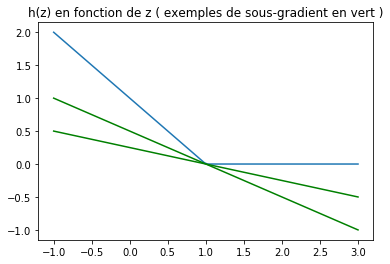

In [4]:
h = lambda z: max(0, 1-z)

s1 = lambda z: .5-.5*z
s2 = lambda z: .25-.25*z

plt.title("h(z) en fonction de z ( exemples de sous-gradient en vert )")
xx = np.linspace(-1, 3, 100)
plt.plot(xx, np.vectorize(h)(xx))
plt.plot(xx, np.vectorize(s1)(xx), c='g')
plt.plot(xx, np.vectorize(s2)(xx), c='g')
plt.show()

On remarque graphiquement que 
$$\partial h(z) = \begin{array}~\{-1\} \text{ si } z < 1 \\ [-1, 0] \text{ si } z= 1 \\ \{0\} \text{ si } z > 1\end{array}$$


# Question 2.3

Posons :

$N : (v, a) \to \sum_i N_i(v_i)$ où $\forall i, N_i(v_i)=\dfrac{1}{2}v_i^2$

$H : (z) \to \sum_i N_i(z_i)$ où $\forall i, H_i(z_i)=\max(0,1 - z_i)$

$M : (v, a) \to diag(y)x(a,v^T)^T$

On a bien $f = N + cH\circ M$

Donc $\partial f = \partial N + \partial (cH\circ M) = \partial N + cM^T\partial H\circ M$

Or $\partial N (v, a) = \{v\}$ et $\partial H (z) = \Pi_i \partial h_i(z_i)$ où les $\partial h_i$ ont été calculés précédemment 



# Question 2.4

In [5]:
x_1 = np.hstack((np.ones((n,1)), x))

In [6]:
def f(v, a):
    v = np.array((a, *v))
    res = 0
    for i in range(n):
        res += max(0, 1 - np.diag(y)[i][i]*x_1[i].dot(v))
    res += .5*np.sum(v**2)
    return res

def df(v, a):
    v = np.array((a, *v))
    M = np.diag(y).dot(x_1)
    Mva = M.dot(v)
    dHmva = np.zeros(n)
    for i in range(n):
        if Mva[i] < 1:
            dHmva[i] = -1
    dn = v[:]
    dn[0] = 0
    return dn + M.T.dot(dHmva)

In [7]:
print(df(np.zeros(p), 0))

[ 145.         -401.67227502 -228.44097367 -408.60883936 -390.09318973
 -197.28489321 -328.22148127 -383.14721063 -427.3041985  -181.84509798
    7.0634352  -312.04525371    4.56861423 -305.99668108 -301.64736575
   36.873181   -161.21243374 -139.60579724 -224.51080955    3.58836467
  -42.90155493 -427.21613038 -251.39455908 -430.77071337 -403.76117734
 -231.89607933 -325.17580208 -362.92710448 -436.63153222 -229.05116772
 -178.19917556]


# Question 2.5

In [8]:
def descente_sous_gradient(v0, a0): #On applique la méthode de descente
    v, a = v0, a0
    for k in range(10000):
        if k%1000==0:
            print(v[0], a)
        d = df(v,a)
        da = d[0]  #Ici c'est la dérivé par rapport à a
        dv = d[1:] #Ici c'est la dérivé par rapport à d
        v = v - dv/(k+1)
        a = a - da/(k+1)
    return v, a

In [9]:
v, a = descente_sous_gradient(np.zeros(p), 0)

0.0 0
1.5485758467972282 -2.24432045447597
0.6102410282056923 -0.5397399598489993
0.4620648255792824 -0.19194344881567474
0.4226848294748329 -0.08619445408013328
0.39474548094084766 -0.06905927776987507
0.3769856754857414 -0.06466695712083675
0.36766542159293736 -0.062492020978087266
0.3618484938176446 -0.06061863411803855
0.35727349120232077 -0.059197092151020626


In [10]:
print("The initial value is: ", f(np.zeros(p), 0), "\n The value of f after the execution of the algorithm:", f(v, a))

The initial value is:  569.0 
 The value of f after the execution of the algorithm: 26.586240198690977


# <font color='red'> 3.Methode du sous-gradient stochastique

## Question 3.1

Let i be a random variable following distribution on \{1,...,n\}. So: $$P(I=k) = \frac{1}{n}$$
\begin{aligned} 
\mathbb{E}\left[f_I(v,a)\right]&=\mathbb{E}\left[\frac{1}{2}\sum_{j=1}^{m}{v_j^2} + c.n.max(0,1-y_I.(x_I^t.v+a)\right] \\
&=\sum_{i=1}^{n}{P(I=i)} (\frac{1}{2}\sum_{j=1}^{m}{v_j^2} + c.n.max(0,1-y_i.(x_i^t.v+a)) \\
&=\sum_{i=1}^{n} {\frac{1}{n} (\frac{1}{2}\sum_{j=1}^{m}{v_j^2} + c.n.max(0,1-y_i.(x_i^t.v+a))} \\
&=\frac{1}{2}\sum_{j=1}^{m}{v_j^2} + c.\sum_{i=1}^{n}{max(0,1-y_i.(x_i^t.v+a))} \\
&=f(v,a)
\end{aligned}

## Question 3.2

\begin{aligned} 
\partial f_i(v,a) &= \left\{
    \begin{array}{ll}
        \partial_v f_i(v,a) \\
        \partial_a f_i(v,a)
    \end{array}
\right. \\
&=\left\{
    \begin{array}{ll}
        v-c.n.y_i.x_i.\partial h(y_i.(x_i^t.v+a)) \\
        -c.n.y_i.x_i.\partial h(y_i.(x_i^t.v+a))
    \end{array}
\right. \\
\end{aligned}

Where

\begin{aligned} 
\partial h(y_i.(x_i^t.v+a)) &= \left\{
    \begin{array}{ll}
        \ -1  & \mbox{if }  y_i.(x_i^t.v+a) < 1 \\
        \ [-1,0] & \mbox{if }  y_i.(x_i^t.v+a) =1 \\
        \ 0 & \mbox{if }  y_i.(x_i^t.v+a)>1
    \end{array}
\right. \\
\end{aligned}

## Question 3.3

In [11]:
def descente_sous_gradient_sto(v0, a0): 
    v, a = v0, a0
    for i in range(2000): 
        i = np.random.uniform(1, n)  # on choisie à chaque fois une valeur de i en appliquant la loi uniforme
        i = int(i)
            
        temp = np.append(v,a)
        vect = y * (np.dot(x_1, temp))
            
        if (vect[i]<=1):
            diff_i = -1
        else:
            diff_i = 0
            
        
        v = v - 1/(1+i) * (v - c * n * y[i] * diff_i * x_1[i,:-1])
        a = a + 1/(1+i) * c * n * y[i] * diff_i
    return v,a

# <font color='red'> 4.Methode du lagrangien augmente

## Question 4.1

The Lagrangian associated to the problem (1) is :
\begin{aligned} 
L(v,a,\xi,\phi,\psi)=\frac{1}{2}\sum_{j=1}^{m}{v_j^2}+c.\sum_{i=1}^{n}{\xi_i}+\sum_{i=1}^{n}{\phi_i.(1-y_i.(x_i^t.v+a)-\xi_i)}
-\sum_{i=1}^{n}{\psi_i.\xi_i}- \iota_{\mathcal{R}_+^n}(\phi)-\iota_{\mathcal{R}_+^n}(\psi)
\end{aligned}

### Question 4.2

We have $$ g(x,\phi)=\frac{-1}{2.\rho}.{\phi}^2+\frac{\rho}{2}.[{max(0,x+\frac{\phi}{\rho})}]^2 $$
if we consider $$ k(x)= max(0,x+\frac{\phi}{\rho}) $$
we obtain
\begin{aligned} 
 \partial k(x) &= \left\{
    \begin{array}{ll}
        \ 1  & \mbox{if }   x > \frac{-\phi}{\rho} \\
        \ 0 & \mbox{if }  x < \frac{-\phi}{\rho} \\
        \ [0,1] & \mbox{if }  x = \frac{-\phi}{\rho}
    \end{array}
\right. \\
\\
\nabla_x g(x,\phi) &= \rho.\partial k(x) .k(x)\\
&=\rho.\partial k(x).max(0,x+\frac{\phi}{\rho}) \\
\end{aligned}

$$ if x > \frac{-\phi}{\rho}:$$
$$\nabla_x g(x,\phi)=\rho.1.max(0,x+\frac{\phi}{\rho})=\rho.max(0,x+\frac{\phi}{\rho})$$

$$ if x < \frac{-\phi}{\rho}:$$
$$\nabla_x g(x,\phi)=\rho.0.max(0,x+\frac{\phi}{\rho})=0=\rho.max(0,x+\frac{\phi}{\rho})$$

$$ if x = \frac{-\phi}{\rho}:$$
$$\nabla_x g(x,\phi)=\rho.\gamma.max(0,0)=0=\rho.max(0,x+\frac{\phi}{\rho})\;\;\;\;\;\;      \gamma \in [0,1]$$

So we obtain: $$ \nabla_x g(x,\phi)=\rho.max(0,x+\frac{\phi}{\rho}) $$


if we consider $$ k(\phi)= max(0,x+\frac{\phi}{\rho}) $$
we obtain
\begin{aligned} 
 \partial k(\phi) &= \left\{
    \begin{array}{ll}
        \ \frac{1}{\rho}  & \mbox{if }   \phi > -x.\rho \\
        \ 0 & \mbox{if } \phi < -x.\rho \\
        \ [0,1] & \mbox{if }  \phi = -x.\rho
    \end{array}
\right. \\
\\
\nabla_\phi g(x,\phi) &= -\frac{1}{\rho}.\phi+\rho.\partial k(\phi) .k(\phi)\\
&=-\frac{1}{\rho}.\phi+\rho.\partial k(\phi) max(0,x+\frac{\phi}{\rho} \\
\end{aligned}
\\
$$ if\phi > -x.\rho:$$
$$\nabla_\phi g(x,\phi)=-\frac{1}{\rho}.\phi+\rho.\frac{1}{\rho} max(0,x+\frac{\phi}{\rho}=x=max(\frac{-\phi}{\rho},x)$$

$$ if \phi < -x.\rho:$$
$$\nabla_\phi g(x,\phi)= -\frac{1}{\rho}.\phi +\rho .0=\frac{-\phi}{\rho}=max(\frac{-\phi}{\rho},x)$$

$$ if \phi =-x.\rho:$$
$$\nabla_\phi g(x,\phi)=-\frac{1}{\rho}.\phi+\rho.\gamma.max(0,0)=\frac{-\phi}{\rho}=max(\frac{-\phi}{\rho},x)\\;\;\;      \gamma \in [0,1]$$



So we obtain: $$ \nabla_\phi g(x,\phi)=max(\frac{-\phi}{\rho},x) $$

### Question 4.3

A function is convexe if and only if its gradient is increasing and is concave if its gradient is deacreasing.

We will demonstrate that g is convex compared to x 

Let $$ x1 \geq x2 $$

and we demonstrate that $$ \nabla_xg(x1, \phi) \geq \nabla_xg(x2, \phi) $$

$$ x1 + \frac{\phi}{\rho} \geq x2 + \frac{\phi}{\rho} $$

$$ max(0, x + \frac{\phi}{\rho} ) \geq max(0, x + \frac{\phi}{\rho}) $$

$$ \nabla_xg(x1, \phi) \geq \nabla_xg(x2, \phi) $$

 Now we will demonstrate that g is concave compared to $\phi$

Let $$ \phi1 \geq \phi2 $$

and we demonstrate that $$ \nabla_\phi g(x, \phi1) \leq \nabla_\phi g(x, \phi2) $$

$$ \phi1 \geq \phi2 $$

$$ -\frac{\phi1}{\rho} \leq -\frac{\phi2}{\rho} $$

$$ max(-\frac{\phi1}{\rho}, x) \leq max(-\frac{\phi2}{\rho}, x) $$

$$ \nabla_\phi g(x, \phi1) \leq \nabla_\phi g(x, \phi2) $$ 

### Question 4.4

In [19]:
def diff_v(v, a, e, psi): #Dérivé du Lagrangien par rapport à v
    dv = np.copy(v)
    temp = np.append(v,a)
    vect = y * (np.dot(x_1, temp))
    for i in range(n):
        dv = dv - y[i] * ro * max(0, 1 - e[i] - vect[i] + (psi[i]/ro)) * x_1[i, : -1]
    return np.asarray(dv)

In [20]:
def diff_e(v, a, e, phi, psi): #Dérivé du Lagrangien par rapport à e
    de = []
    temp = np.append(v,a)
    vect = y * (np.dot(x_1, temp))
    for i in range(n):
        de.append(c - ro * max(0, phi[i]/ro - e[i]) + ro * max(0, 1 - vect[i] + psi[i]/ro)) 
    return np.asarray(de)

In [21]:
def diff_a(v, a, e, psi): #Dérivé du Lagrangien par rapport à a
    da = 0
    temp = np.append(v,a)
    vect = y * (np.dot(x_1, temp))
    for i in range(n):
        da = da - y[i]* ro * max(0, 1 - e[i] - vect[i] + psi[i]/ro) 
    return da

In [22]:
ro = 2
def min_L (v0, a0, e0, phi, psi): #La fonction qui calcule le minimum de L en appliquant la méthode de gradient sur v, a, e
    v, a, e = v0, a0, e0
    k = 0
    while True:
        dv = diff_v(v, a, e, psi)
        da = diff_a(v, a, e, psi)
        de = diff_e(v, a, e, phi, psi)
        v = v - dv*(1.0)/(k+1)
        a = a - da*(1.0)/(k+1)
        e = e - (1.0/(1+k))*de
        k = k + 1
        norm = np.sqrt(np.linalg.norm(dv)**2+np.linalg.norm(da)**2+np.linalg.norm(de)**2)
        print(norm)
        if (norm<1):
            break
    return v, a, e

### Question 4.5

In [23]:
def nabla_L (v, a, e, phi, psi):
    nabla_phi = []
    nabla_psi = []
    temp = np.append(v,a)
    vect = y * (np.dot(x_1, temp))
    for i in range(n):
        nabla_phi.append(max(-phi[i]/ro, -e[i]))
        nabla_psi.append(max(-psi[i]/ro, 1-e[i]-vect[i]))
    return np.array([nabla_phi, nabla_psi])

In [24]:
def Lagrangien_augmente (phi0, psi0):
    
    #Initialization
    phi = phi0
    psi = psi0
    v0 = np.zeros(p)
    a0 = 0
    e0 = np.zeros(n)
    
    #Application de la méthode du lagrangien augmenté
    for i in range (2000):
        v, a, e = min_L (v0, a0, e0, phi, psi)
        nabla = nabla_L(v, a, e, phi, psi)
        phi = phi + ro* nabla[0]
        psi = psi + ro* nabla[1]
        v0 = v
        a0 = a
        e0 = e
    return v, a, e, phi, psi

In [25]:
Lagrangien_augmente(np.zeros(x.shape[0]),np.zeros(x.shape[0]))

3221.742720027952
971784.4776004096
3250388700.1487384
1212029930283.5378
1669602650754394.8
4.254880420110852e+17
3.758562743245645e+20
6.9926278251918616e+22
4.588706796731929e+25
6.666546874547736e+27
3.4839067263638495e+30
4.145017780891027e+32
1.798628825612613e+35
1.811316149549875e+37
6.713774311326505e+39
5.860930196567853e+41
1.8943774261135245e+44
1.4594527483452284e+46
4.1789053279294205e+48
2.8810768321763997e+50
7.399531221863813e+52
4.616280503545088e+54
1.0742266556378153e+57
6.119567772136036e+58
1.3010159748169933e+61
6.819283074656171e+62
1.333775245506585e+65
6.4737759911829575e+66
1.1718200447151781e+69
5.295914041873049e+70
8.917070508540416e+72
3.7703135031459054e+74
5.931550797643793e+76
2.3561855368437765e+78
3.4770128284935547e+80
1.3023609726529597e+82
1.8089890257244593e+84
6.410108562608733e+85
8.40653258609001e+87
2.8263360921432126e+89
3.509321157609578e+91
1.1224059280894865e+93
1.322759385482669e+95
4.0342420171368873e+96
4.5228527703396913e+98
1.3182037

C:\Users\ahlem jouidi\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in multiply
  
C:\Users\ahlem jouidi\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in subtract
  
C:\Users\ahlem jouidi\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in double_scalars
  
C:\Users\ahlem jouidi\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in subtract
  if __name__ == '__main__':


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


KeyboardInterrupt: 

# <font color='red'> 5.Comparaison 

The sub_gradient algorithm gives better results then the sub-gradient stochastic and the augumented_lagrangien.